# prepare exercise

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
iris = load_iris()

In [2]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [3]:
print(iris.target_names) 
print(iris.target)
print(iris.feature_names) 

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
exerciseData = [4.8, 2.5, 5.3, 2.4]
#segmenting exerciseData into sepal and petal
checkSepal = [ exerciseData[0], exerciseData[1]] 
checkPetal = [ exerciseData[2], exerciseData[3]] 

In [26]:
#function to plot data
def plot_dataset(data_x, data_y, exercise_data_x, exercise_data_y):
    colors = ["yellow", "blue", "green"]
    for index, point in enumerate(data_x):
        plt.scatter(point[0], point[1], color=colors[data_y[index]])
    plt.scatter(exercise_data_x,exercise_data_y, color="red")
    plt.show()

# 1. train modell for sepal prediction

In [5]:
X_sepal = iris["data"][:, (0, 1)]  #sepal values from data
y_sepal = iris["target"] #target values as numeric value

In [6]:
sepal_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10, random_state=0)
sepal_model.fit(X_sepal,y_sepal)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# 1.1 propability for virginica based on sepal

In [7]:
sepalPredict = sepal_model.predict([ checkSepal ])
sepalProb = sepal_model.predict_proba([checkSepal])

print("Sepal based on:", checkSepal,
      "is an iris", iris.target_names[sepalPredict][0],
      "=> probability: ", round(sepalProb[0][sepalPredict][0]*100, 5),
      "%" )

Sepal based on: [4.8, 2.5] is an iris versicolor => probability:  53.61383 %


# 1.2 plot sepal data (exercise data are the red dot)

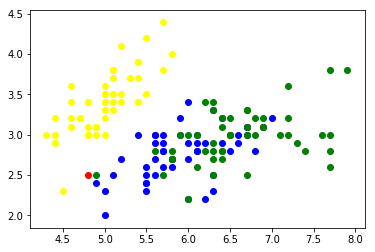

In [27]:
plot_dataset(X_sepal, y_sepal, exerciseData[0], exerciseData[1])

# 2. train modell for petal prediction

In [28]:
X_petal = iris["data"][:, (2, 3)]  #petal values from data
y_petal = iris["target"] 

In [29]:
petal_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10, random_state=0)
petal_model.fit(X_petal,y_petal)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# 2.1 propability for virginica based on petal

In [30]:
petalPredict = petal_model.predict([ checkPetal ])
petalProb = petal_model.predict_proba([checkPetal])

print("Petal based on:", checkPetal,
      "is an iris", iris.target_names[petalPredict][0],
      "=> probability: ", round(petalProb[0][petalPredict][0]*100, 5),
      "%" )

Petal based on: [5.3, 2.4] is an iris virginica => probability:  99.87688 %


# 2.2 plot petal data (exercise data are the red dot)

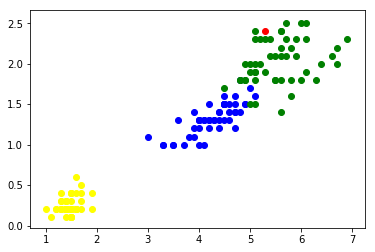

In [31]:
plot_dataset(X_petal, y_petal, exerciseData[2], exerciseData[3])

# 3. evaluate all 4 values in a (combined) equation to get one single probability

In [12]:
#train modell for prediction with all features
all_X = iris["data"]
all_y = iris["target"]

all_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10, random_state=0)
all_model.fit(all_X,all_y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
allPredict = all_model.predict([exerciseData])
allProb = all_model.predict_proba([exerciseData])

# 3.1 propability for virginica based on all features

In [14]:
print("all features based on:", exerciseData,
      "is an iris", iris.target_names[allPredict][0],
      "=> probability: ", round(allProb[0][allPredict][0]*100, 5),
      "%" )

all features based on: [4.8, 2.5, 5.3, 2.4] is an iris virginica => probability:  99.99571 %
